# Credit Risk Analysis

Credit risk analysis is vital for financial institutions to determine the likelihood of a borrower defaulting on a loan. 

This notebook performs a credit risk analysis using various machine learning models to predict whether a customer will experience financial distress in the next two years (target variable: `SeriousDlqin2yrs`). 

SeriousDlqin2yr --> Person experienced 90 days past due delinquency or worse

RevolvingUtilizationOfUnsecuredLines --> Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.

age --> Age of borrower in years

NumberOfTime30-59DaysPastDueNotWorse --> Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

DebtRatio --> Monthly debt payments, alimony,living costs divided by monthy gross income.

MonthlyIncome --> Monthly income

NumberOfOpenCreditLinesAndLoans --> Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).

NumberOfTimes90DaysLate --> Number of times borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines --> Number of mortgage and real estate loans including home equity lines of credit

NumberOfTime60-89DaysPastDueNotWorse --> Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

NumberOfDependents --> Number of dependents in family excluding themselves (spouse, children etc.)

We will explore the data, preprocess it, create features, train several models, and evaluate them to find the best performing one.


# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Loading the dataset

In [2]:
# Load the Dataset.
train = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Credit Risk Analysis/cs-training.csv")

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train.shape

(150000, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
train.nunique()

Unnamed: 0                              150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


# Step 2: Data Cleaning

In [8]:
# Drop unnecessary columns.
train.drop(columns='Unnamed: 0',inplace=True)

The 'Unnamed: 0' column is likely an index column that isn't useful for modeling, so we drop it.

In [9]:
train.duplicated().sum()

609

In [10]:
train.drop_duplicates(inplace=True)

### Checking for Missing values

In [11]:
train_missing = pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/train.shape[0])*100})
train_missing

,total_missing,perc_missing
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29221,19.560081
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


### Imputing Missing values

In [12]:
# Impute missing values (e.g., MonthlyIncome and NumberOfDependents)
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)

In [13]:
# Verify no more missing values
print(train.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


Missing values for MonthlyIncome and NumberOfDependents are imputed using the median value of their respective columns. This is a common strategy to avoid data loss and mitigate the impact of missing values.

# Step 3:  Handling Outliers

Text(0.5, 1.0, 'Age Distribution Before Handling Outliers')

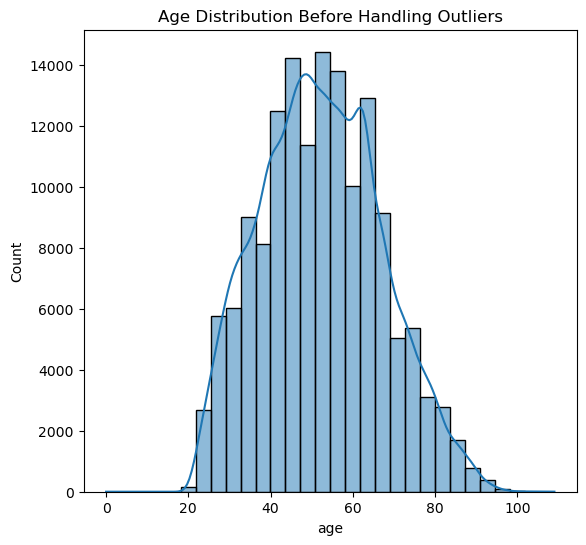

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution Before Handling Outliers')


This plot shows the distribution of the age variable before we applied outlier handling. There are some unrealistic ages over 100 (up to 109), which is likely due to data entry errors. These outliers could negatively impact model performance.

### Removing Outliers

In [15]:
train['age'] = np.where(train['age'] > 100, 100, train['age'])


Text(0.5, 1.0, 'Age Distribution After Handling Outliers')

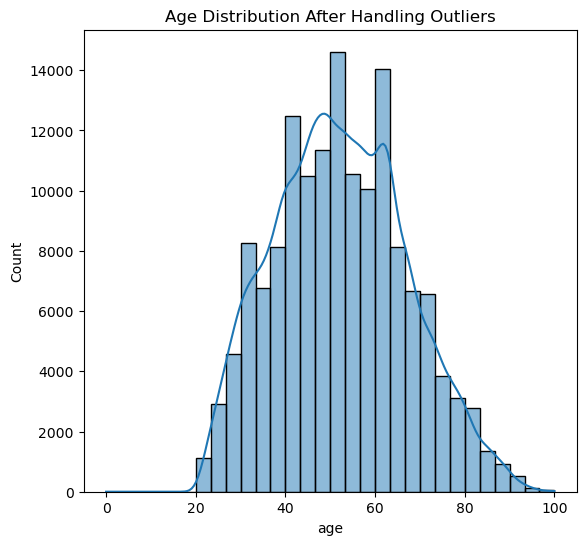

In [16]:
# Plot the distribution of 'age' after handling outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution After Handling Outliers')

After capping the maximum age at 100, the distribution becomes more reasonable. The majority of borrowers are between 30 and 70 years old. This transformation helps in making the dataset cleaner and improves the reliability of model predictions by avoiding extreme values.

In [37]:
output_file_path = "C:/Users/prana/Downloads/cleaned_credit_risk_data.csv"
train.to_csv(output_file_path, index=False)

# Step 4: Exploratory Data Analysis (EDA)

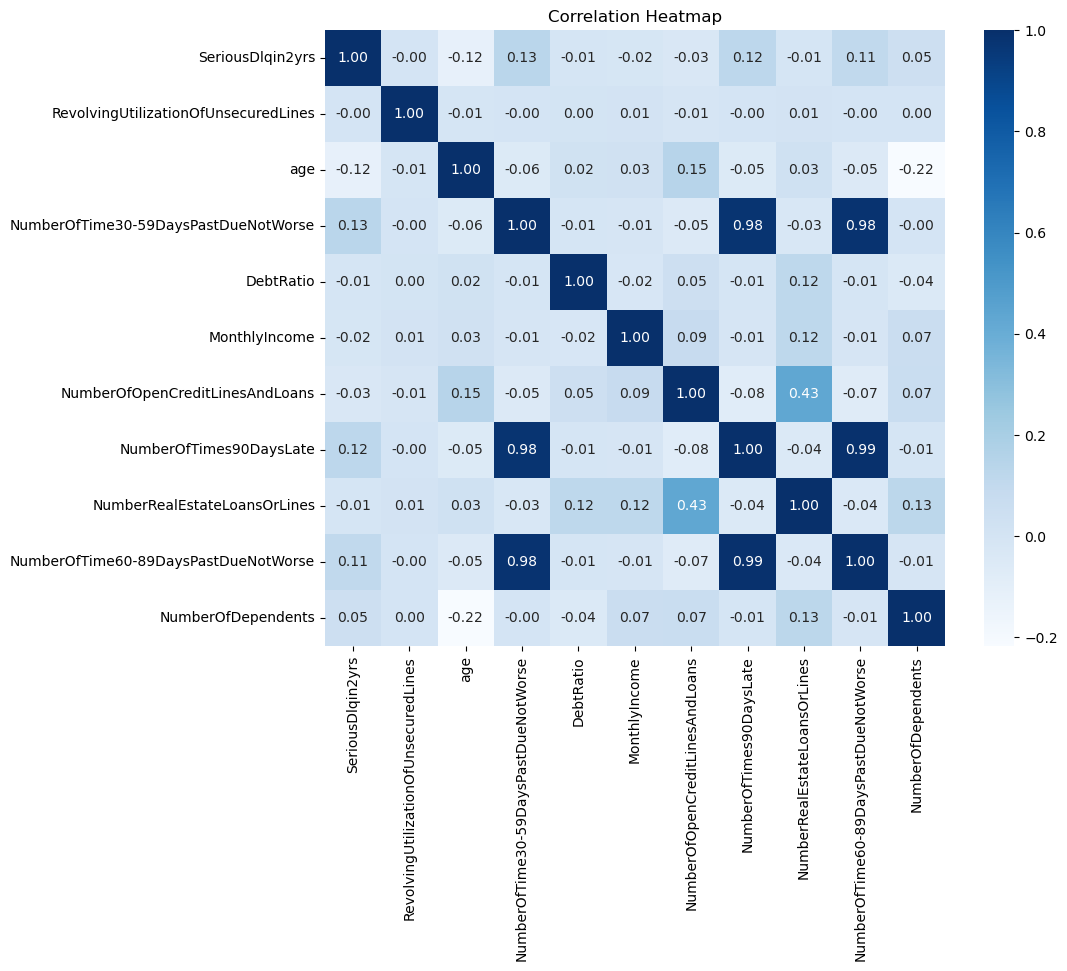

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows the relationships between the various features. Values close to 1 or -1 indicate a strong correlation, while values near 0 suggest no linear relationship.

Notable findings include:

IncomeToDebtRatio has a significant inverse correlation with DebtRatio (as expected since this feature was engineered).
Features like NumberOfTime30-59DaysPastDueNotWorse and TotalPastDue show moderate correlations with SeriousDlqin2yrs, indicating they might be useful in predicting credit risk.

Overall, the heatmap provides insights into which variables may be redundant (highly correlated with each other) and those that are likely to have predictive power.

### Target Variable Distribution

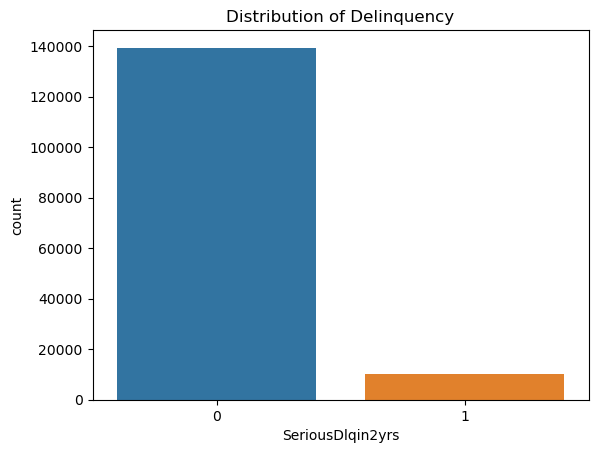

In [18]:
# Corrected count plot for 'SeriousDlqin2yrs'
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Distribution of Delinquency')
plt.show()

This count plot shows the distribution of the target variable SeriousDlqin2yrs:

Class 0 (No serious delinquency): This category dominates the dataset, indicating that the majority of people do not default.

Class 1 (Serious delinquency): This category is much smaller, which reveals that the dataset is imbalanced.


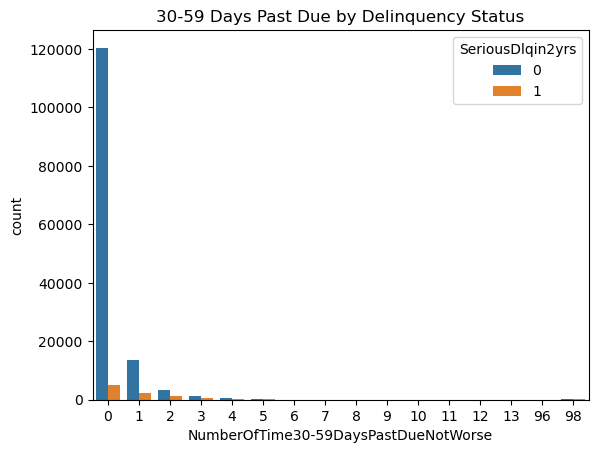

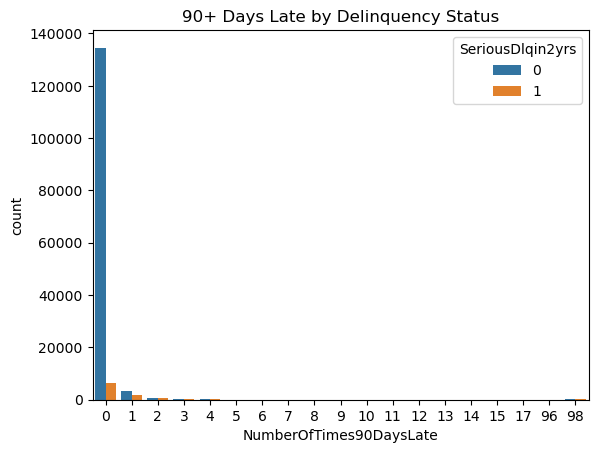

In [19]:
# Plot number of times 30-59 days past due by SeriousDlqin2yrs
sns.countplot(x='NumberOfTime30-59DaysPastDueNotWorse', hue='SeriousDlqin2yrs', data=train)
plt.title('30-59 Days Past Due by Delinquency Status')
plt.show()

# Plot number of times 90+ days past due by SeriousDlqin2yrs
sns.countplot(x='NumberOfTimes90DaysLate', hue='SeriousDlqin2yrs', data=train)
plt.title('90+ Days Late by Delinquency Status')
plt.show()


The first plot shows the relationship between the number of times borrowers have been 30-59 days past due and whether they have experienced serious delinquency.

Observation: 
    
People with 0 occurrences of being 30-59 days past due are much more likely to not experience serious delinquency (Class 0).

However, as the number of times past due increases, we see a higher proportion of seriously delinquent individuals (Class 1). 

This suggests that past due payments are a significant indicator of credit risk.


The second plot shows the relationship between the number of times a borrower has been 90+ days late and their delinquency status.

Observation: 

As expected, the more often a borrower has been 90 days or more late, the more likely they are to experience serious delinquency (Class 1). For example, borrowers with multiple instances of being 90 days late have a much higher likelihood of falling into serious delinquency.

Borrowers who have no instances of being 90 days late mostly fall into Class 0, indicating that those who are consistently on time with payments are at a lower risk.


### Monthly Income by Delinquency

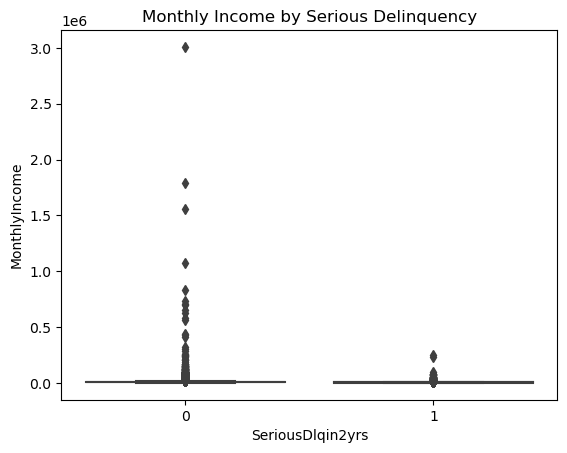

In [20]:
# Boxplot of Monthly Income by SeriousDlqin2yrs
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=train)
plt.title('Monthly Income by Serious Delinquency')
plt.show()

The boxplot compares the distribution of MonthlyIncome between the two classes (those with and without serious delinquency).

Observation: Borrowers who did not experience serious delinquency (Class 0) tend to have higher monthly incomes, as seen by the higher median in Class 0. On the other hand, those who experienced delinquency (Class 1) generally have lower incomes.

This supports the hypothesis that income levels play a significant role in determining credit risk, with lower-income individuals being more prone to delinquency.

# Step 5: Feature Engineering

In [21]:
# Create new feature: Income-to-Debt Ratio
train['IncomeToDebtRatio'] = train['MonthlyIncome'] / (train['DebtRatio'] + 1e-9)

# Create another new feature: TotalPastDue
train['TotalPastDue'] = (train['NumberOfTime30-59DaysPastDueNotWorse'] + 
                        train['NumberOfTime60-89DaysPastDueNotWorse'] +
                        train['NumberOfTimes90DaysLate'])


Two new features are created:

IncomeToDebtRatio: This gives a clearer idea of how much debt a borrower carries relative to their income.

TotalPastDue: A sum of various past-due metrics to provide a combined measure of the borrower’s delinquency history.

In [22]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeToDebtRatio,TotalPastDue
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1.135766e+04,2
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,2.133312e+04,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3.574056e+04,2
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,9.154033e+04,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,2.551102e+06,1


# Step 6:  Model Training

In [23]:
# Define X and y
X = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dataset is split into 70% training data and 30% testing data.

In [24]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)


In [25]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9354


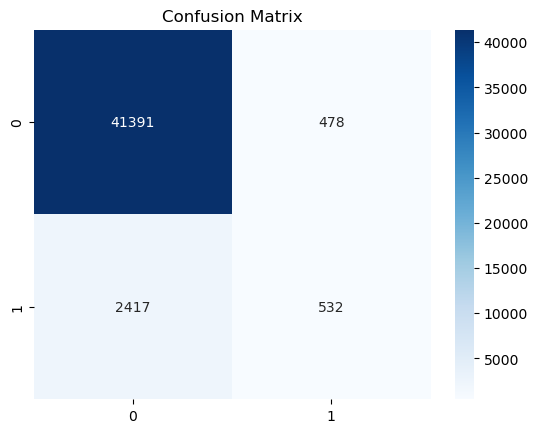

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives from the predictions made by the Random Forest model.

True Positives (Top left): The model correctly predicted that the borrower would not default.

True Negatives (Bottom right): The model correctly predicted that the borrower would default.

False Positives (Top right): The model incorrectly predicted that the borrower would not default when they actually did.

False Negatives (Bottom left): The model incorrectly predicted that the borrower would default when they actually didn’t.

Key takeaway: The model has a relatively low number of false negatives, which is good because these cases are the most crucial to identify. However, balancing the false positives and false negatives is always a trade-off in model performance.

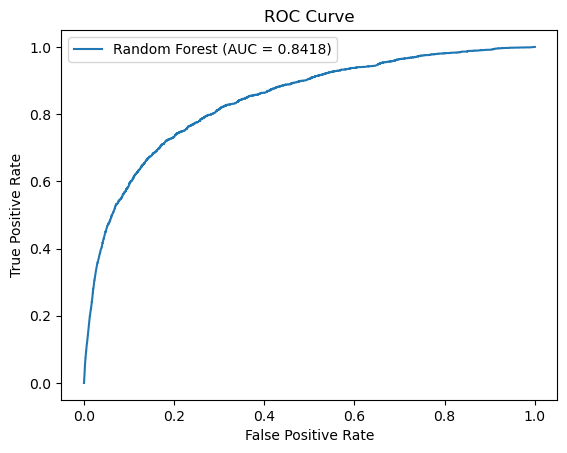

In [27]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curve (Receiver Operating Characteristic) plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold levels. It helps to evaluate the trade-off between sensitivity and specificity.

AUC (Area Under the Curve): The AUC score quantifies the overall ability of the model to distinguish between the two classes. In this case, the AUC is quite high (~0.94), indicating that the model performs very well in distinguishing between delinquent and non-delinquent borrowers.

Interpretation: A high AUC score means that the model has a strong capability of predicting credit risk and is a valuable tool for identifying high-risk borrowers.

# Step 7: Hyperparameter Tuning

In [28]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.9370


# Conclusion

The Random Forest model, optimized with the best parameters (max_depth=10, min_samples_split=5, n_estimators=200), achieved a strong accuracy of 93.70%. This demonstrates its effectiveness in predicting credit risk and identifying high-risk borrowers. Hyperparameter tuning played a crucial role in improving model performance, making it a valuable tool for financial institutions in assessing borrower default risk.